# Estimación de la estabilidad estadística de las simulaciones del software Casino v2

In [2]:
import pyautogui # contienen funciones que automatizan los movimientos del puntero y de las entradas del teclado 
import time
import numpy as np
import matplotlib.pyplot as plt

In [3]:
currentMouseX, currentMouseY = pyautogui.position()
print(f' en x = {currentMouseX}, en y = {currentMouseY}')

 en x = 498, en y = 404


In [41]:
espesores=[[195,250,3120],[635,770],[1450],[1800,2250]]
#espesores=[espesores[-1]]
#espesores=[[3120]]
espesores

[[195, 250, 3120], [635, 770], [1450], [1800, 2250]]

'19'

In [11]:
time.sleep(3)
tini=time.time()
name='SS'
energy=10
e0=15
for listac in espesores:
    tt=0.01 #tiempo de respuesta de los comandos
    #listac = [120,400,720,900,1080]#15#[20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600, 660, 720, 780, 840, 900, 960, 1020, 1080, 1140, 1200, 1280, 1360, 1440, 1520, 1600, 1680, 1760, 1840, 1920, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4200, 4400, 4600, 4800, 5000]
    #cambiar energía 
    pyautogui.moveTo(272,56,duration=tt,tween=pyautogui.easeInOutQuad)
    pyautogui.click()
    pyautogui.moveTo(578,270,duration=tt,tween=pyautogui.easeInOutQuad)
    pyautogui.click()
    pyautogui.click()
    pyautogui.write(str(30),interval=0.1)
    pyautogui.press('enter')
    for thickness in listac:
        for i in range(0,16):
            pyautogui.moveTo(243,54,duration=tt,tween=pyautogui.easeInOutQuad)
            pyautogui.click()
            pyautogui.moveTo(776,177,duration=tt,tween=pyautogui.easeInOutQuad)
            pyautogui.click()
            pyautogui.write(str(thickness),interval=0.05)
            pyautogui.press('enter')
            pyautogui.press('enter')
            pyautogui.moveTo(15,30,duration=tt,tween=pyautogui.easeInOutQuad)
            pyautogui.click()
            pyautogui.moveTo(30,120,duration=tt,tween=pyautogui.easeInOutQuad)
            pyautogui.click()
            pyautogui.write(f'TiN_on_{name}_{energy}KV_{thickness}_nm_{i}',interval=0.05)
            pyautogui.press('enter')
        print(f'está listo el archivo .sim de {thickness}')
    energy = energy+5
tfini=time.time()
print(f'Done!, la ejecución tardó {tfini-tini} segundos')

está listo el archivo .sim de 3120
Done!, la ejecución tardó 50.12123465538025 segundos


In [19]:
import pyautogui
import time
import os 
import pandas as pd 
tiniT=time.time()

path='C:\\Users\\Juan Pablo Nicolás\\Documents\\FISICA\\FISICA ESTUDIO\\MICROSCOPIA ELECTRONICA\\paper ecuacion Ene2021\\Sim_batch\\Matrix Simulation\\SS\\Estabilidad SS\\12Mar'
files=os.listdir(path)
#encuentra la ruta
files_cas = [f for f in files if f[-4:] == '.cas']
#toma solo los archivos terminados en .cas
daux={}
total=[]
for file in files_cas:
    newstr = ''.join((ch if ch in '0123456789-e' else ' ') for ch in file)#toma los numeros del nombre del archivo
    listOfNumbers = [int(i) for i in newstr.split()]#ubica los números dentro de un diccionario
    daux['name']=file
    daux['thickness']=listOfNumbers[1]
    daux['energy'] = listOfNumbers[0]
    daux['number'] = listOfNumbers[2]
    total.append(daux)
    daux={}
from operator import itemgetter
total.sort(key=itemgetter('thickness')) # ordena los diccionarios de total de menor a mayor thickness
##ABRIR CASINO_v2
pyautogui.FAILSAFE = True # si se desplaza el puntero a la esquina superior izquierda el programa deja de ejecutarse
for index in total: 
    name=index['name']
    thickness=index['thickness']
    energy = index['energy']
    number = index['number']
    tt=0.1
    time.sleep(2)#tiempo de espera mientras se abre la simulacion .cas #crítico
    #movimiento del puntero dentro del software ´para abrir 
    pyautogui.moveTo(15,28, duration=tt, tween=pyautogui.easeInOutQuad)
    pyautogui.click()
    pyautogui.moveTo(15,73,duration=tt, tween=pyautogui.easeInOutQuad)
    pyautogui.click()
    time.sleep(1)
    pyautogui.write(name)
    pyautogui.press('enter')
    print(f'el archivo {name} ha sido abierto!')
    t0=time.time()
    th=40
    x,y=8,80
    xs1=0
    ys1=0
    ys2=0
    time.sleep(2)# tiempo mientras se abre el archivo .cas
    
    xs1=37#distancia del
    ys1=51
    ys2=18#distancia entre carpeta y carpeta
    tt=0.1
    pyautogui.moveTo(x, y, duration=tt, tween=pyautogui.easeInOutQuad)
    pyautogui.click()
    pyautogui.move(0,ys1, duration=tt, tween=pyautogui.easeInOutQuad)
    pyautogui.move(xs1,0, duration=tt, tween=pyautogui.easeInOutQuad)
    pyautogui.click()
    ##export
    pyautogui.moveTo(48, 57, duration=tt, tween=pyautogui.easeInOutQuad)
    pyautogui.moveTo(218,57, duration=tt, tween=pyautogui.easeInOutQuad)
    pyautogui.click()
    pyautogui.write(f'TiN_on_SS_{energy}_KV_{thickness}_nm_time_{number}', interval=0.1*tt)
    pyautogui.press('enter')
    pyautogui.moveTo(x, y, duration=tt, tween=pyautogui.easeInOutQuad)
    pyautogui.click()
    pyautogui.moveTo(x, y+ys2, duration=tt, tween=pyautogui.easeInOutQuad)
    y=y+ys2
    x=x
    
    tf=time.time()
    delta=tf-t0
    print(delta)
    print(f'{name} Done!')
tfinT=time.time()
print(f'Los archivos .dat estan listos, la operación tardo {tfinT-tiniT} segundos, {(tfinT-tiniT)/60} minutos o {(tfinT-tiniT)/3600} horas.')

el archivo TiN_on_SS_10KV_195_nm_0.cas ha sido abierto!
3.908446788787842
TiN_on_SS_10KV_195_nm_0.cas Done!
el archivo TiN_on_SS_10KV_195_nm_1.cas ha sido abierto!
3.8665764331817627
TiN_on_SS_10KV_195_nm_1.cas Done!
el archivo TiN_on_SS_10KV_195_nm_10.cas ha sido abierto!
3.8994197845458984
TiN_on_SS_10KV_195_nm_10.cas Done!
el archivo TiN_on_SS_10KV_195_nm_11.cas ha sido abierto!
3.9021522998809814
TiN_on_SS_10KV_195_nm_11.cas Done!
el archivo TiN_on_SS_10KV_195_nm_12.cas ha sido abierto!
3.9113597869873047
TiN_on_SS_10KV_195_nm_12.cas Done!
el archivo TiN_on_SS_10KV_195_nm_13.cas ha sido abierto!
3.912903070449829
TiN_on_SS_10KV_195_nm_13.cas Done!
el archivo TiN_on_SS_10KV_195_nm_14.cas ha sido abierto!
3.8273253440856934
TiN_on_SS_10KV_195_nm_14.cas Done!
el archivo TiN_on_SS_10KV_195_nm_15.cas ha sido abierto!
3.8394858837127686
TiN_on_SS_10KV_195_nm_15.cas Done!
el archivo TiN_on_SS_10KV_195_nm_2.cas ha sido abierto!
3.8611719608306885
TiN_on_SS_10KV_195_nm_2.cas Done!
el archiv

el archivo TiN_on_SS_20KV_1450_nm_5.cas ha sido abierto!
3.8366787433624268
TiN_on_SS_20KV_1450_nm_5.cas Done!
el archivo TiN_on_SS_20KV_1450_nm_6.cas ha sido abierto!
3.8786349296569824
TiN_on_SS_20KV_1450_nm_6.cas Done!
el archivo TiN_on_SS_20KV_1450_nm_7.cas ha sido abierto!
3.886878490447998
TiN_on_SS_20KV_1450_nm_7.cas Done!
el archivo TiN_on_SS_20KV_1450_nm_8.cas ha sido abierto!
3.9109585285186768
TiN_on_SS_20KV_1450_nm_8.cas Done!
el archivo TiN_on_SS_20KV_1450_nm_9.cas ha sido abierto!
3.9326767921447754
TiN_on_SS_20KV_1450_nm_9.cas Done!
el archivo TiN_on_SS_25KV_1800_nm_0.cas ha sido abierto!
3.868333101272583
TiN_on_SS_25KV_1800_nm_0.cas Done!
el archivo TiN_on_SS_25KV_1800_nm_1.cas ha sido abierto!
3.866403579711914
TiN_on_SS_25KV_1800_nm_1.cas Done!
el archivo TiN_on_SS_25KV_1800_nm_10.cas ha sido abierto!
3.8583598136901855
TiN_on_SS_25KV_1800_nm_10.cas Done!
el archivo TiN_on_SS_25KV_1800_nm_11.cas ha sido abierto!
3.877411127090454
TiN_on_SS_25KV_1800_nm_11.cas Done!
e

In [19]:
lisctac

[152, 680, 1585, 2559, 3356]

In [20]:
import os 
import re #regular expression
import pandas as pd 
import matplotlib.pyplot as plt
path='C:\\Users\\Juan Pablo Nicolás\\Documents\\FISICA\\FISICA ESTUDIO\\MICROSCOPIA ELECTRONICA\\paper ecuacion Ene2021\\Sim_batch\\Matrix Simulation\\SS\\Estabilidad SS\\12Mar'
files=os.listdir(path)
files_dat =[]
files_dat = [f for f in files if f[-4:] == '.dat']
dic_unsort=[]
Tika=[]
Feka=[]
Sika=[]
energy=[]
thickness=[]
times=[]
for s in files_dat:
    newstr = ''.join((ch if ch in '0123456789-' else ' ') for ch in s)#toma los numeros del nombre del archivo
    listOfNumbers = [int(i) for i in newstr.split()]#ubica los números dentro de un diccionario
    energy.append(listOfNumbers[0])
    thickness.append(listOfNumbers[1])
    times.append(listOfNumbers[-1])
    f = open(path+'\\'+s,'r')
    text = f.read()
    x=re.findall('ABS: (\d+...........|\d+..........|\d+........|\d+........|\d+.......|\d+......|\d+.....|\d+....|\d+|\d+.|\d+..|\d+...)|(Ti|Fe)',text)
    dic_unsort.append(x)
    #print(len(x),listOfNumbers[0],listOfNumbers[1])
    Tika.append(float(x[1][0]))
    c=-1
    vFe=0
    for j in x:
        c=c+1
        if j[1]=='Fe':
            vFe=float(x[c+1][0])
            break
        else:
            continue
        
    if vFe==0.0:
        Feka.append(0.0)
    else:
        if vFe > 0.001:
            Feka.append(vFe)
        else:
            Feka.append(0.0)

In [21]:
dic_data={'Energy':energy,'Thickness':thickness,'Tika':Tika,'Feka':Feka,'Times':times}
df=pd.DataFrame(dic_data)
df['I_ratio']=df.Feka/df.Tika
df

,Energy,Thickness,Tika,Feka,Times,I_ratio
0,10,195,470.932,7.07254,0,0.015018
1,10,195,469.073,7.17817,1,0.015303
2,10,195,470.192,7.03657,10,0.014965
3,10,195,467.505,7.17204,11,0.015341
4,10,195,470.720,6.99921,12,0.014869
...,...,...,...,...,...,...
123,25,2250,5092.180,7.22271,5,0.001418
124,25,2250,5115.270,6.22353,6,0.001217
125,25,2250,5106.810,6.63234,7,0.001299
126,25,2250,5096.330,6.02834,8,0.001183


In [17]:
files=os.listdir(path)
files

['TiN_on_SS_10KV_195_nm_0.cas',
 'TiN_on_SS_10KV_195_nm_0.sim',
 'TiN_on_SS_10KV_195_nm_1.cas',
 'TiN_on_SS_10KV_195_nm_1.sim',
 'TiN_on_SS_10KV_195_nm_10.cas',
 'TiN_on_SS_10KV_195_nm_10.sim',
 'TiN_on_SS_10KV_195_nm_11.cas',
 'TiN_on_SS_10KV_195_nm_11.sim',
 'TiN_on_SS_10KV_195_nm_12.cas',
 'TiN_on_SS_10KV_195_nm_12.sim',
 'TiN_on_SS_10KV_195_nm_13.cas',
 'TiN_on_SS_10KV_195_nm_13.sim',
 'TiN_on_SS_10KV_195_nm_14.cas',
 'TiN_on_SS_10KV_195_nm_14.sim',
 'TiN_on_SS_10KV_195_nm_15.cas',
 'TiN_on_SS_10KV_195_nm_15.sim',
 'TiN_on_SS_10KV_195_nm_2.cas',
 'TiN_on_SS_10KV_195_nm_2.sim',
 'TiN_on_SS_10KV_195_nm_3.cas',
 'TiN_on_SS_10KV_195_nm_3.sim',
 'TiN_on_SS_10KV_195_nm_4.cas',
 'TiN_on_SS_10KV_195_nm_4.sim',
 'TiN_on_SS_10KV_195_nm_5.cas',
 'TiN_on_SS_10KV_195_nm_5.sim',
 'TiN_on_SS_10KV_195_nm_6.cas',
 'TiN_on_SS_10KV_195_nm_6.sim',
 'TiN_on_SS_10KV_195_nm_7.cas',
 'TiN_on_SS_10KV_195_nm_7.sim',
 'TiN_on_SS_10KV_195_nm_8.cas',
 'TiN_on_SS_10KV_195_nm_8.sim',
 'TiN_on_SS_10KV_195_nm_9.ca

In [5]:
df[(df.Energy==10)&(df.Thickness==126)].sort_values('Times')

,Energy,Thickness,Tika,Feka,Times,I_ratio
0,10,126,329.646,35.9971,0,0.109199
1,10,126,329.064,36.1859,1,0.109966
8,10,126,328.028,35.9657,2,0.109642
9,10,126,329.076,35.9474,3,0.109237
10,10,126,328.740,35.9175,4,0.109258
11,10,126,327.638,35.7456,5,0.109101
12,10,126,328.966,35.9413,6,0.109255
13,10,126,327.164,36.2224,7,0.110716
14,10,126,327.897,35.8867,8,0.109445
15,10,126,328.705,35.7283,9,0.108694


In [40]:
df[(df.Energy==10) & (df.Thickness==3120)].Energy

32    10
33    10
34    10
35    10
36    10
37    10
38    10
39    10
40    10
41    10
42    10
43    10
44    10
45    10
46    10
47    10
Name: Energy, dtype: int64

In [39]:
df[(df.Energy==30)]

,Energy,Thickness,Tika,Feka,Times,I_ratio


In [43]:
espesoresd = {10:espesores[0],
 15:espesores[1],
 20:espesores[2],
 25:espesores[3]}

In [44]:
dica={}
thc0=[]
en0=[]
avg0=[]
std0=[]
Tiavg=[]
Tistd=[]
Feavg=[]
Festd=[]
nnn=0
for i in espesoresd:
    for j in espesoresd[i]:
        Iavg = df[(df.Thickness==j) & (df.Energy==i)].sort_values('Times').I_ratio.mean()
        Istdd = df[(df.Thickness==j) & (df.Energy==i)].sort_values('Times').I_ratio.std()
        #tiavg = df[(df.Thickness==j) & (df.Energy==i)].sort_values('Times').Tika.mean()
        #tistd = df[(df.Thickness==j) & (df.Energy==i)].sort_values('Times').Tika.std()
        #siavg = df[(df.Thickness==j) & (df.Energy==i)].sort_values('Times').Sika.mean()
        #sistd = df[(df.Thickness==j) & (df.Energy==i)].sort_values('Times').Sika.std()
        thc0.append(j)
        en0.append(i)
        avg0.append(Iavg)
        std0.append(Istdd)
        #Tiavg.append(tiavg)
        #Siavg.append(siavg)
        #Tistd.append(tistd)
        #Sistd.append(sistd)
        #dica['Pstd'] = stdd/avg*100
dica['Energy'] = en0
dica['Thickness'] = thc0
dica['I_Avg'] = avg0
dica['I_Std'] = std0
#dica['Tiavg']=Tiavg
#dica['Siavg']=Siavg
#dica['Tistd']=Tistd
#dica['Sistd']=Sistd

In [45]:
dfstb

,Energy,Thickness,I_Avg,I_Std,Pstd
0,10,195,0.014924,0.000296,1.981961
1,10,250,0.001312,0.000049,3.757766
2,15,635,0.011301,0.000235,2.075154
3,15,770,0.001664,0.000066,3.952564
4,20,1450,0.001346,0.000102,7.547966
5,25,1800,0.011839,0.000477,4.025347
6,25,2250,0.001286,0.000065,5.082450
7,30,3120,NaN,NaN,NaN


In [46]:
dfstb=pd.DataFrame(dica)
dfstb['Pstd']=dfstb.I_Std/dfstb.I_Avg*100
#dfstb['Si_Pstd']=dfstb.Sistd/dfstb.Siavg*100
#dfstb['Ti_Pstd']=dfstb.Tistd/dfstb.Tiavg*100
dfstb
dfaux=dfstb.set_index(['Energy','Thickness'])
#plt.plot(dfstb[dfstb.Energy==10].Thickness,dfstb[dfstb.Energy==10].Pstd,'r*')
#dfaux.to_excel(path+'\\'+'Corregido_Desv_TiN_on_SS.xlsx')
dfstb

,Energy,Thickness,I_Avg,I_Std,Pstd
0,10,195,0.014924,0.000296,1.981961
1,10,250,0.001312,0.000049,3.757766
2,10,3120,0.001437,0.000069,4.788903
3,15,635,0.011301,0.000235,2.075154
4,15,770,0.001664,0.000066,3.952564
5,20,1450,0.001346,0.000102,7.547966
6,25,1800,0.011839,0.000477,4.025347
7,25,2250,0.001286,0.000065,5.082450


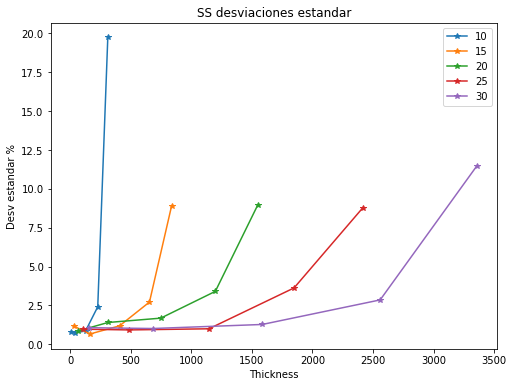

In [20]:
for i in espesores:
    plt.rcParams["figure.figsize"] = (8,6)
    plt.plot(dfstb[dfstb.Energy==i].Thickness,dfstb[dfstb.Energy==i].Pstd,'-*',label=i)
    #plt.yscale('log')
    plt.ylabel('Desv estandar %')
    plt.xlabel('Thickness')
    plt.legend()
plt.title('SS desviaciones estandar')
plt.savefig('SS_stddev.jpg',format='jpg',dpi=300)

In [9]:
i=15
plt.plot(dfstb[dfstb.Energy==i].Thickness,dfstb[dfstb.Energy==i].Pstd,'g-*',label=i)

NameError: name 'dfstb' is not defined